In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import polars as pl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import src.utils as utils

In [3]:
df = utils.process_csv("data/godot.csv.gz")
df

DataFrame loaded with 426104 rows and 5 columns.


event_date,actor_id,object_id,daily_event_count,object_type
date,str,str,i64,str
2015-10-27,"""6265307""","""issue_91920046""",1,"""issue"""
2015-10-27,"""9574367""","""issue_113595290""",1,"""issue"""
2015-10-27,"""6129594""","""issue_113638875""",1,"""issue"""
2015-10-27,"""15351888""","""issue_113710944""",1,"""issue"""
2015-10-27,"""9574367""","""issue_113168033""",1,"""issue"""
…,…,…,…,…
2025-04-25,"""4701338""","""issue_3019657312""",1,"""issue"""
2025-04-25,"""66727710""","""pr_104731""",9,"""pr"""
2025-04-25,"""32321""","""pr_105706""",2,"""pr"""


In [4]:
stats_df = utils.rolling_window_stats(df, event_type="pr").filter(pl.col("rolling_unique_actors").is_not_null())

In [5]:
stats_df = stats_df.with_columns([
    (pl.col("rolling_event_count") / pl.col("rolling_unique_actors")).alias("events_per_actor")
])
stats_df

event_date,rolling_unique_actors,rolling_event_count,events_per_actor
date,u32,i64,f64
2016-05-23,63,103,1.634921
2016-05-27,62,102,1.645161
2016-05-28,63,104,1.650794
2016-05-29,64,108,1.6875
2016-05-30,65,114,1.753846
…,…,…,…
2025-04-21,636,3420,5.377358
2025-04-22,654,3502,5.35474
2025-04-23,666,3602,5.408408


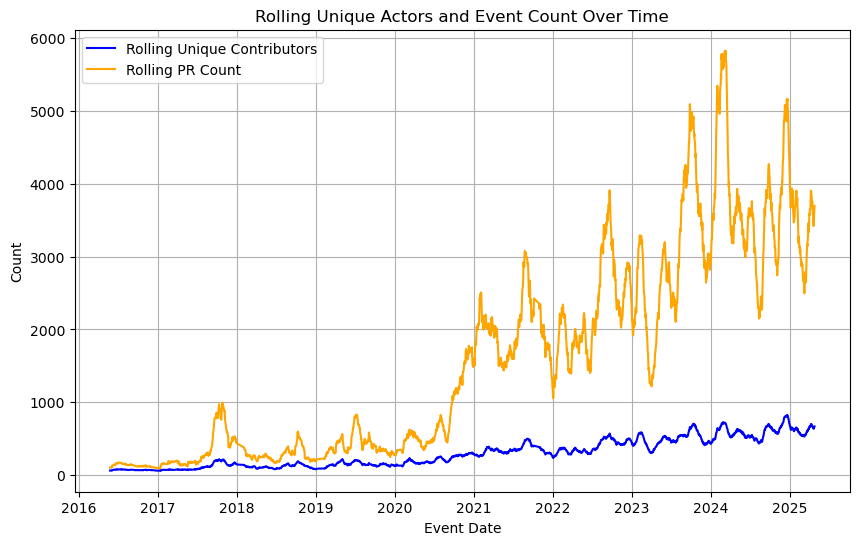

In [6]:
# Plot rolling_unique_actors and rolling_event_count as time series
plt.figure(figsize=(10, 6))
plt.plot(stats_df["event_date"], stats_df["rolling_unique_actors"], label="Rolling Unique Contributors", color="blue")
plt.plot(stats_df["event_date"], stats_df["rolling_event_count"], label="Rolling PR Count", color="orange")
plt.xlabel("Event Date")
plt.ylabel("Count")
plt.title("Rolling Unique Actors and Event Count Over Time")
plt.legend()
plt.grid(True)
plt.show()

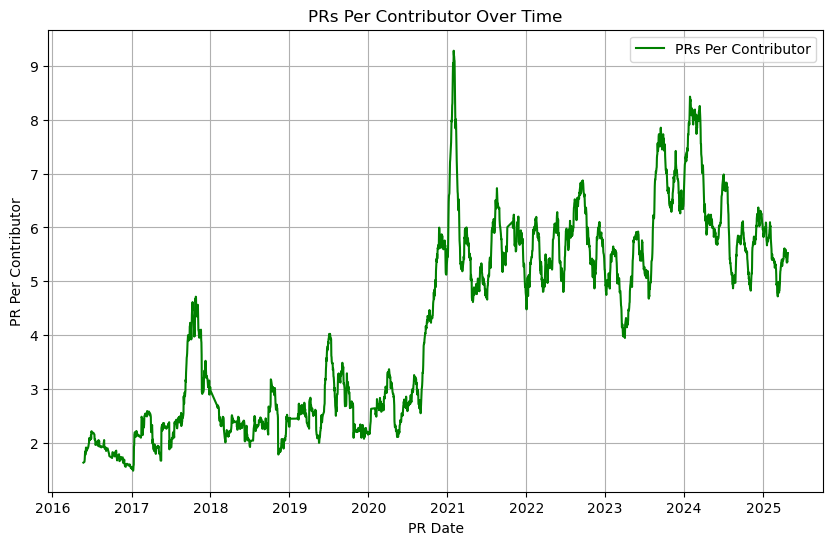

In [7]:
# Plot events_per_actor as a time series
plt.figure(figsize=(10, 6))
plt.plot(stats_df["event_date"], stats_df["events_per_actor"], label="PRs Per Contributor", color="green")
plt.xlabel("PR Date")
plt.ylabel("PR Per Contributor")
plt.title("PRs Per Contributor Over Time")
plt.legend()
plt.grid(True)
plt.show()

In [8]:
df

event_date,actor_id,object_id,daily_event_count,object_type
date,str,str,i64,str
2015-10-27,"""6265307""","""issue_91920046""",1,"""issue"""
2015-10-27,"""9574367""","""issue_113595290""",1,"""issue"""
2015-10-27,"""6129594""","""issue_113638875""",1,"""issue"""
2015-10-27,"""15351888""","""issue_113710944""",1,"""issue"""
2015-10-27,"""9574367""","""issue_113168033""",1,"""issue"""
…,…,…,…,…
2025-04-25,"""4701338""","""issue_3019657312""",1,"""issue"""
2025-04-25,"""66727710""","""pr_104731""",9,"""pr"""
2025-04-25,"""32321""","""pr_105706""",2,"""pr"""


In [9]:
# Ensure the function returns the expected number of values
graphs_by_date = utils.create_graphs_by_date(df)

# Process the graphs to extract metrics
metrics_df = utils.graphs_metrics_to_dataframe(graphs_by_date)
metrics_df

number_of_nodes,number_of_edges,average_clustering,density,average_degree,event_date
i64,i64,f64,f64,f64,str
16,12,0.0,0.1,1.5,"""2015-10-27"""
32,28,0.0,0.056452,1.75,"""2015-10-28"""
119,121,0.0,0.017234,2.033613,"""2015-10-29"""
71,64,0.0,0.025755,1.802817,"""2015-10-30"""
42,39,0.0,0.045296,1.857143,"""2015-10-31"""
…,…,…,…,…,…
192,154,0.0,0.008399,1.604167,"""2025-04-21"""
262,243,0.0,0.007107,1.854962,"""2025-04-22"""
229,189,0.0,0.00724,1.650655,"""2025-04-23"""


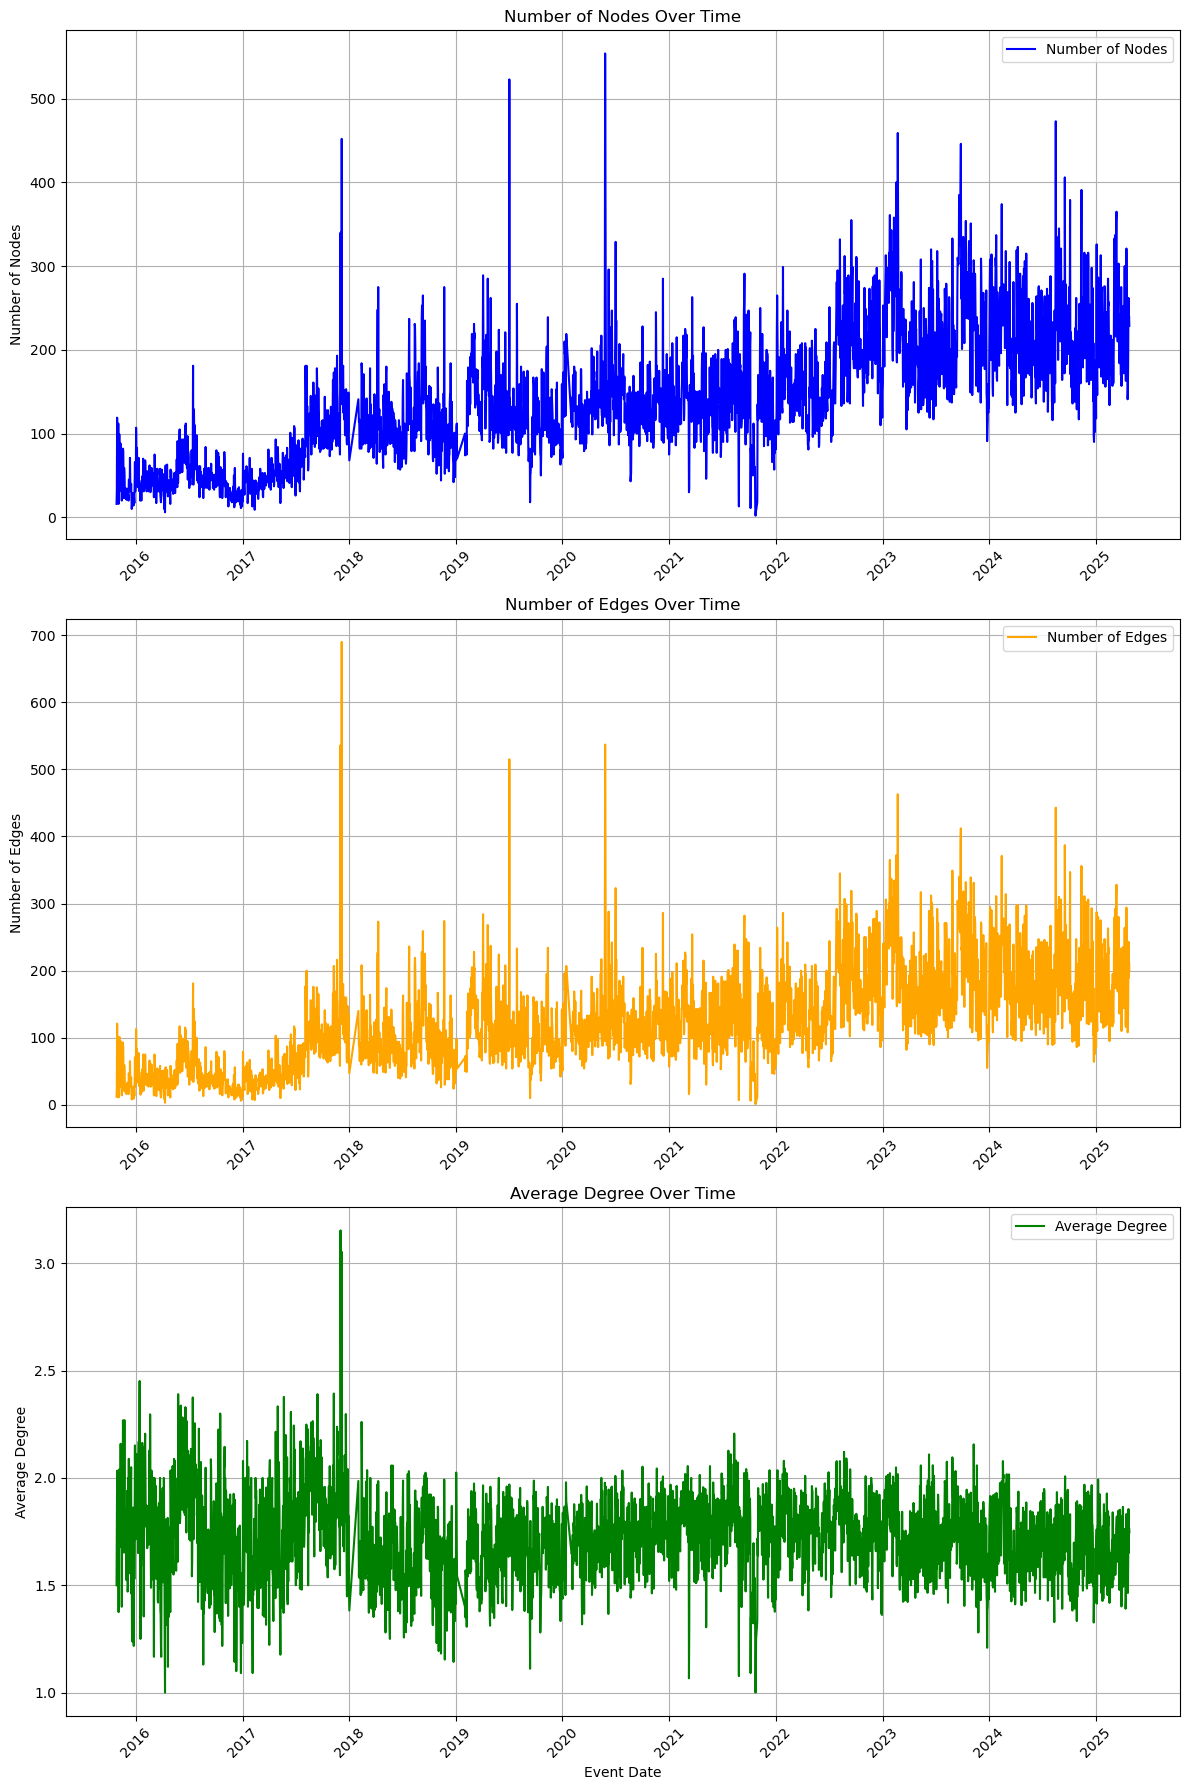

In [10]:
# Convert event_date to datetime format
plot_metrics_df = metrics_df.with_columns(pl.col("event_date").str.strptime(pl.Date, "%Y-%m-%d"))

# Create a figure with subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 18), sharex=False)

# Plot number_of_nodes
axes[0].plot(plot_metrics_df["event_date"], plot_metrics_df["number_of_nodes"], label="Number of Nodes", color="blue")
axes[0].set_ylabel("Number of Nodes")
axes[0].set_title("Number of Nodes Over Time")
axes[0].legend()
axes[0].grid(True)

# Plot number_of_edges
axes[1].plot(plot_metrics_df["event_date"], plot_metrics_df["number_of_edges"], label="Number of Edges", color="orange")
axes[1].set_ylabel("Number of Edges")
axes[1].set_title("Number of Edges Over Time")
axes[1].legend()
axes[1].grid(True)

# Plot average_degree
axes[2].plot(plot_metrics_df["event_date"], plot_metrics_df["average_degree"], label="Average Degree", color="green")
axes[2].set_xlabel("Event Date")
axes[2].set_ylabel("Average Degree")
axes[2].set_title("Average Degree Over Time")
axes[2].legend()
axes[2].grid(True)

# Format x-axis for better readability
for ax in axes:
    ax.xaxis.set_major_locator(mdates.YearLocator())  # Show ticks every year
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format ticks as years
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Adjust layout
plt.tight_layout()
plt.show()